<a href="https://colab.research.google.com/github/cucdengjunli/-/blob/master/CodeFormer_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://user-images.githubusercontent.com/14334509/179359809-bd45566a-486d-418f-83fa-67bbbba8c45c.png" height=120>
</p>

# CodeFormer Inference Demo
## Towards Robust Blind Face Restoration with Codebook Lookup Transformer (NeurIPS 2022)
Shangchen Zhou, Kelvin C.K. Chan, Chongyi Li, Chen Change Loy

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer) [![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2206.11253) [![Hugging Face](https://img.shields.io/badge/Demo-%F0%9F%A4%97%20Hugging%20Face-blue)](https://huggingface.co/spaces/sczhou/CodeFormer) ![visitors](https://visitor-badge.glitch.me/badge?page_id=sczhou/CodeFormer)

# 1. Preparations
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 565, done.
remote: Counting objects: 100% (565/565), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 565 (delta 272), reused 510 (delta 257), pack-reused 0
Receiving objects: 100% (565/565), 17.29 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (272/272), done.
/content/CodeFormer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated. Requirements should be satisfied by a PEP 517 installer. If you are using pip, you can try `pip install --use-pep517`.
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warn

&nbsp;
***
&nbsp;
# 2. Test on your images 😀

*   Old photos
*   AI-created face images by DALLE2/Midjourney/Stable Diffusion

If CodeFormer is helpful to your photos, please help star our [repo](https://github.com/sczhou/CodeFormer). Thanks! 🤗

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer)

In [ ]:
# Upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving FaXKqX6XwAAWUck.png to FaXKqX6XwAAWUck.png
move FaXKqX6XwAAWUck.png to inputs/user_upload/FaXKqX6XwAAWUck.png


In [ ]:
# Inference the uploaded images
#@markdown `CODEFORMER_FIDELITY`: Balance the quality (lower number) and fidelity (higher number)<br>
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = False #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload

Using [retinaface_resnet50] for face detection network.
Processing: FaXKqX6XwAAWUck.png
	detect 1 faces

All results are saved in results/user_upload_0.7


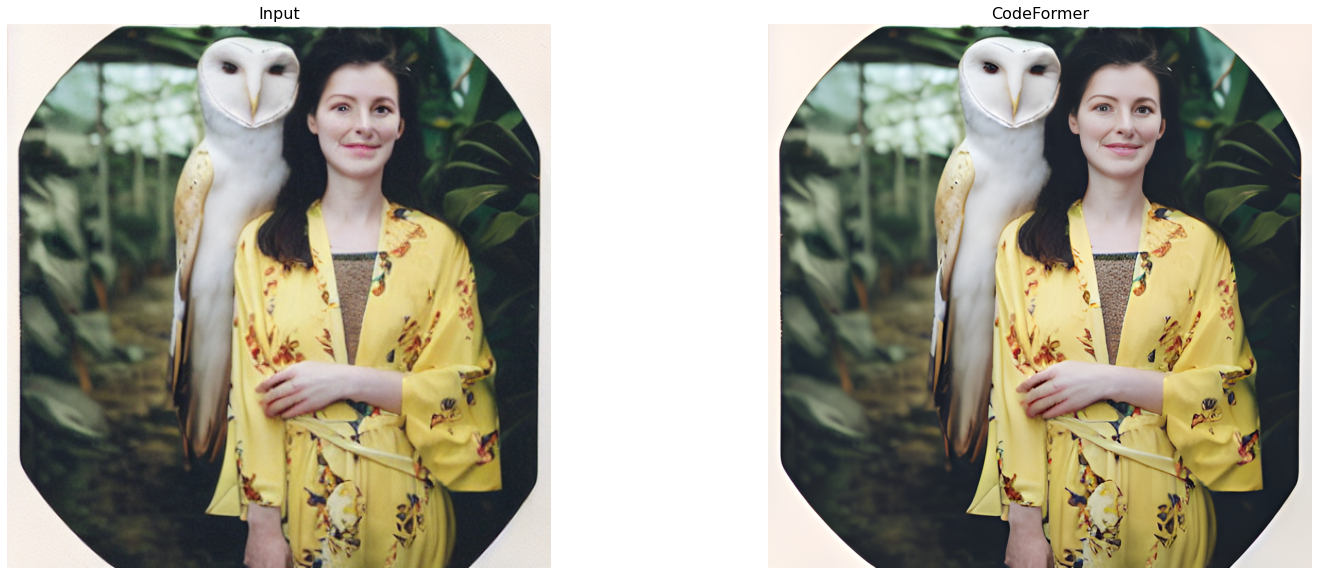

In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
# Download results
!ls results
print('Download results')
os.system(f'zip -r results.zip results/user_upload_{CODEFORMER_FIDELITY}/final_results')
files.download("results.zip")

user_upload_0.7
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

&nbsp;
***
&nbsp;
## 3. Inference on the demo images (whole images)

In [ ]:
# We set w to 0.7 for the whole images
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.7
!python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/whole_imgs --bg_upsampler realesrgan

Processing: 00.jpg
	detect 4 faces
Processing: 01.jpg
	detect 4 faces
Processing: 02.png
	detect 4 faces
Processing: 03.jpg
	detect 1 faces
Processing: 04.jpg
	detect 1 faces
Processing: 05.jpg
	detect 1 faces
Processing: 06.png
	detect 2 faces

All results are saved in results/whole_imgs_0.7


In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/whole_imgs'
result_folder = f'results/whole_imgs_{w}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

此单元格的输出内容太大，只能在登录的情况下显示。


&nbsp;
***
&nbsp;
# 4. Inference on the demo faces (croped and aligned faces)

In [ ]:
!rm -rf results

# We set w to 0.5 for the cropped and aligned faces
CODEFORMER_FIDELITY = 0.5
!python inference_codeformer.py -w $CODEFORMER_FIDELITY --has_aligned --input_path inputs/cropped_faces

Processing: 0143.png
Processing: 0240.png
Processing: 0342.png
Processing: 0345.png
Processing: 0368.png
Processing: 0412.png
Processing: 0444.png
Processing: 0478.png
Processing: 0500.png
Processing: 0599.png
Processing: 0717.png
Processing: 0720.png
Processing: 0729.png
Processing: 0763.png
Processing: 0770.png
Processing: 0777.png
Processing: 0885.png
Processing: 0934.png
Processing: Solvay_conference_1927_0018.png
Processing: Solvay_conference_1927_2_16.png

All results are saved in results/cropped_faces_0.5


In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/cropped_faces'
result_folder = f'results/cropped_faces_{w}/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

此单元格的输出内容太大，只能在登录的情况下显示。
